
## Section 1: Problem Formulation

### Introduction:
In this project, we aim to explore the effectiveness of contrastive learning, specifically using the SimCLR algorithm, 
for image classification tasks under the constraint of having limited labeled data. Contrastive learning is a technique 
in self-supervised learning that learns to encode similar items closer in the feature space while pushing dissimilar items further apart.


In [1]:
import sys
on_linux = sys.platform.startswith('linux')

In [2]:
# Import necessary libraries
import torch

# Check if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
args = {
    "dataset": "cifar10",
    "model": "resnet50",
    "batch_size": 256,
    "sample_rate": 1,
    "epochs": 100,
    "n_views": 2,
    "out_dim": 128,
    "lr": 3e-4,
    "wd": 1e-6,
    "log_every_n_steps": 5,
    "n_workers": 16,
    "temperature": 0.07,
    "learning": "contrastive",
    "val_split": 0.2,
}


## Section 2: Dataset Preparations

In this section, we will prepare the CIFAR-10, CIFAR-100, and MedMNIST datasets for training. 
We will apply necessary transformations and split the datasets into training, validation, and test sets.


In [4]:
from dataset import SimCLRDataset
data = SimCLRDataset(args["dataset"])
build_dataloader = lambda dataset: torch.utils.data.DataLoader(
    dataset,
    batch_size=args["batch_size"],
    shuffle=True,
    drop_last=True,
    num_workers=args["n_workers"],
)
train_dataset, val_dataset = data.get_train_val_datasets(args["n_views"], args["val_split"])
train_loader = build_dataloader(train_dataset)
val_loader = build_dataloader(val_dataset)
test_dataset = data.get_test_dataset(args["n_views"])
test_loader = build_dataloader(test_dataset)
num_classes = data.num_classes
print("# Classes:", num_classes)
print("# Train, Val, Test:", len(train_dataset), len(val_dataset), len(test_dataset))

Files already downloaded and verified
Files already downloaded and verified
# Classes: 10
# Train, Val, Test: 40000 10000 10000


## Section 3: Deep Learning Model

In this section, we will prepare the popular choice of deep learning model like ResNet18 and VGG16.


In [5]:
from model import SimCLRCNN 
model_args = {
    "backbone": args["model"],
    "out_dim": args["out_dim"] if args["learning"] == "contrastive" else num_classes,
    "mod": args["learning"] == "contrastive",
}
model = SimCLRCNN(**model_args).to(device)
if on_linux:
    model = torch.compile(model)
    torch.set_float32_matmul_precision('high')

## Section 4: Contrastive Training

In [6]:
from train import contrastive_training, supervised_training
from eval import info_nce_loss
if args["learning"] == "contrastive":
    loss_fn = info_nce_loss
    criterion = torch.nn.CrossEntropyLoss()
    train_records, test_records = contrastive_training(model, train_loader, val_loader, loss_fn, criterion, device, args)
else:
    loss_fn = torch.nn.CrossEntropyLoss()
    train_records, test_records = supervised_training(model, train_loader, val_loader, loss_fn, device, args)

100%|██████████| 39/39 [00:34<00:00,  1.14it/s]


Epoch: 0	Loss: 7.5304	
Epoch: 0	Top1 accuracy: 0.0814	Top5 accuracy: 0.4612	Test loss: 7.5601


100%|██████████| 39/39 [00:09<00:00,  4.24it/s]


Epoch: 1	Loss: 7.4205	


100%|██████████| 39/39 [00:09<00:00,  4.20it/s]


Epoch: 2	Loss: 7.3822	


100%|██████████| 39/39 [00:09<00:00,  4.12it/s]


Epoch: 3	Loss: 7.3335	


100%|██████████| 39/39 [00:09<00:00,  4.18it/s]


Epoch: 4	Loss: 7.2001	


100%|██████████| 39/39 [00:09<00:00,  4.11it/s]


Epoch: 5	Loss: 7.1680	
Epoch: 5	Top1 accuracy: 0.4123	Top5 accuracy: 1.7958	Test loss: 7.1547


100%|██████████| 39/39 [00:09<00:00,  4.13it/s]


Epoch: 6	Loss: 7.0547	


100%|██████████| 39/39 [00:09<00:00,  4.02it/s]


Epoch: 7	Loss: 6.9907	


100%|██████████| 39/39 [00:09<00:00,  4.05it/s]


Epoch: 8	Loss: 6.9406	


100%|██████████| 39/39 [00:09<00:00,  4.09it/s]


Epoch: 9	Loss: 6.9004	


100%|██████████| 39/39 [00:09<00:00,  4.05it/s]


Epoch: 10	Loss: 6.8914	
Epoch: 10	Top1 accuracy: 0.9874	Top5 accuracy: 3.5970	Test loss: 7.0107


100%|██████████| 39/39 [00:09<00:00,  4.00it/s]


Epoch: 11	Loss: 6.7019	


100%|██████████| 39/39 [00:09<00:00,  4.06it/s]


Epoch: 12	Loss: 6.7773	


100%|██████████| 39/39 [00:09<00:00,  4.07it/s]


Epoch: 13	Loss: 6.6453	


100%|██████████| 39/39 [00:09<00:00,  4.01it/s]


Epoch: 14	Loss: 6.6958	


100%|██████████| 39/39 [00:09<00:00,  4.03it/s]


Epoch: 15	Loss: 6.7427	
Epoch: 15	Top1 accuracy: 1.6927	Top5 accuracy: 5.7671	Test loss: 6.7512


100%|██████████| 39/39 [00:09<00:00,  3.99it/s]


Epoch: 16	Loss: 6.6090	


100%|██████████| 39/39 [00:09<00:00,  3.99it/s]


Epoch: 17	Loss: 6.5926	


100%|██████████| 39/39 [00:09<00:00,  3.96it/s]


Epoch: 18	Loss: 6.5342	


100%|██████████| 39/39 [00:09<00:00,  4.00it/s]


Epoch: 19	Loss: 6.5371	


100%|██████████| 39/39 [00:09<00:00,  3.98it/s]


Epoch: 20	Loss: 6.5272	
Epoch: 20	Top1 accuracy: 2.1756	Top5 accuracy: 7.4436	Test loss: 6.5872


100%|██████████| 39/39 [00:10<00:00,  3.84it/s]


Epoch: 21	Loss: 6.2700	


100%|██████████| 39/39 [00:09<00:00,  3.93it/s]


Epoch: 22	Loss: 6.2566	


100%|██████████| 39/39 [00:10<00:00,  3.68it/s]


Epoch: 23	Loss: 6.2799	


100%|██████████| 39/39 [00:10<00:00,  3.80it/s]


Epoch: 24	Loss: 6.2957	


100%|██████████| 39/39 [00:10<00:00,  3.68it/s]

Epoch: 25	Loss: 6.2508	


Epoch: 25	Top1 accuracy: 4.3511	Top5 accuracy: 11.8435	Test loss: 6.2917


100%|██████████| 39/39 [00:10<00:00,  3.73it/s]


Epoch: 26	Loss: 6.1419	


100%|██████████| 39/39 [00:09<00:00,  3.90it/s]


Epoch: 27	Loss: 6.1012	


100%|██████████| 39/39 [00:10<00:00,  3.88it/s]


Epoch: 28	Loss: 6.0929	


100%|██████████| 39/39 [00:10<00:00,  3.64it/s]


Epoch: 29	Loss: 6.0818	


100%|██████████| 39/39 [00:10<00:00,  3.66it/s]


Epoch: 30	Loss: 6.1212	
Epoch: 30	Top1 accuracy: 4.3728	Top5 accuracy: 13.1999	Test loss: 6.1306


100%|██████████| 39/39 [00:10<00:00,  3.73it/s]


Epoch: 31	Loss: 5.9732	


100%|██████████| 39/39 [00:10<00:00,  3.65it/s]


Epoch: 32	Loss: 6.0168	


100%|██████████| 39/39 [00:10<00:00,  3.82it/s]


Epoch: 33	Loss: 5.9695	


100%|██████████| 39/39 [00:10<00:00,  3.60it/s]


Epoch: 34	Loss: 6.0098	


100%|██████████| 39/39 [00:11<00:00,  3.54it/s]

Epoch: 35	Loss: 6.0527	


Epoch: 35	Top1 accuracy: 5.9353	Top5 accuracy: 15.5056	Test loss: 6.0194


100%|██████████| 39/39 [00:11<00:00,  3.29it/s]


Epoch: 36	Loss: 5.9215	


100%|██████████| 39/39 [00:10<00:00,  3.71it/s]


Epoch: 37	Loss: 5.9388	


100%|██████████| 39/39 [00:10<00:00,  3.85it/s]


Epoch: 38	Loss: 5.8908	


100%|██████████| 39/39 [00:10<00:00,  3.81it/s]


Epoch: 39	Loss: 5.8384	


100%|██████████| 39/39 [00:10<00:00,  3.81it/s]


Epoch: 40	Loss: 5.8531	
Epoch: 40	Top1 accuracy: 5.9353	Top5 accuracy: 15.4080	Test loss: 6.0517


100%|██████████| 39/39 [00:10<00:00,  3.81it/s]


Epoch: 41	Loss: 5.8742	


100%|██████████| 39/39 [00:10<00:00,  3.81it/s]


Epoch: 42	Loss: 5.9142	


100%|██████████| 39/39 [00:10<00:00,  3.73it/s]


Epoch: 43	Loss: 5.8720	


100%|██████████| 39/39 [00:10<00:00,  3.76it/s]


Epoch: 44	Loss: 5.8105	


100%|██████████| 39/39 [00:10<00:00,  3.79it/s]

Epoch: 45	Loss: 5.8591	


Epoch: 45	Top1 accuracy: 6.0981	Top5 accuracy: 16.4551	Test loss: 5.8782


100%|██████████| 39/39 [00:10<00:00,  3.71it/s]


Epoch: 46	Loss: 5.7526	


100%|██████████| 39/39 [00:10<00:00,  3.80it/s]


Epoch: 47	Loss: 5.7685	


100%|██████████| 39/39 [00:10<00:00,  3.75it/s]


Epoch: 48	Loss: 5.8340	


100%|██████████| 39/39 [00:10<00:00,  3.73it/s]


Epoch: 49	Loss: 5.8709	


100%|██████████| 39/39 [00:10<00:00,  3.76it/s]


Epoch: 50	Loss: 5.9329	
Epoch: 50	Top1 accuracy: 6.3531	Top5 accuracy: 17.4588	Test loss: 5.8425


100%|██████████| 39/39 [00:10<00:00,  3.73it/s]


Epoch: 51	Loss: 5.8281	


100%|██████████| 39/39 [00:10<00:00,  3.78it/s]


Epoch: 52	Loss: 5.9097	


100%|██████████| 39/39 [00:10<00:00,  3.76it/s]


Epoch: 53	Loss: 5.8625	


100%|██████████| 39/39 [00:11<00:00,  3.53it/s]


Epoch: 54	Loss: 5.9005	


100%|██████████| 39/39 [00:12<00:00,  3.16it/s]


Epoch: 55	Loss: 5.8811	
Epoch: 55	Top1 accuracy: 6.2554	Top5 accuracy: 17.1332	Test loss: 5.8830


100%|██████████| 39/39 [00:11<00:00,  3.35it/s]


Epoch: 56	Loss: 5.9684	


100%|██████████| 39/39 [00:11<00:00,  3.32it/s]


Epoch: 57	Loss: 5.9831	


100%|██████████| 39/39 [00:11<00:00,  3.45it/s]


Epoch: 58	Loss: 5.9028	


100%|██████████| 39/39 [00:11<00:00,  3.41it/s]


Epoch: 59	Loss: 5.9107	


100%|██████████| 39/39 [00:11<00:00,  3.51it/s]


Epoch: 60	Loss: 5.8635	
Epoch: 60	Top1 accuracy: 6.0330	Top5 accuracy: 16.5310	Test loss: 5.8805


100%|██████████| 39/39 [00:10<00:00,  3.65it/s]


Epoch: 61	Loss: 5.8401	


100%|██████████| 39/39 [00:10<00:00,  3.69it/s]


Epoch: 62	Loss: 5.7697	


100%|██████████| 39/39 [00:10<00:00,  3.65it/s]


Epoch: 63	Loss: 5.7898	


100%|██████████| 39/39 [00:11<00:00,  3.53it/s]


Epoch: 64	Loss: 5.7555	


100%|██████████| 39/39 [00:11<00:00,  3.53it/s]

Epoch: 65	Loss: 5.7734	


Epoch: 65	Top1 accuracy: 6.7925	Top5 accuracy: 17.2743	Test loss: 5.9751


100%|██████████| 39/39 [00:11<00:00,  3.39it/s]


Epoch: 66	Loss: 5.8273	


100%|██████████| 39/39 [00:10<00:00,  3.64it/s]


Epoch: 67	Loss: 5.7965	


100%|██████████| 39/39 [00:10<00:00,  3.75it/s]


Epoch: 68	Loss: 5.7424	


100%|██████████| 39/39 [00:10<00:00,  3.73it/s]


Epoch: 69	Loss: 5.8930	


100%|██████████| 39/39 [00:10<00:00,  3.78it/s]


Epoch: 70	Loss: 5.6675	
Epoch: 70	Top1 accuracy: 7.3730	Top5 accuracy: 18.7609	Test loss: 5.9026


100%|██████████| 39/39 [00:10<00:00,  3.68it/s]


Epoch: 71	Loss: 5.7517	


100%|██████████| 39/39 [00:10<00:00,  3.77it/s]


Epoch: 72	Loss: 5.7494	


100%|██████████| 39/39 [00:10<00:00,  3.76it/s]


Epoch: 73	Loss: 5.7353	


100%|██████████| 39/39 [00:10<00:00,  3.82it/s]


Epoch: 74	Loss: 5.7771	


100%|██████████| 39/39 [00:10<00:00,  3.73it/s]


Epoch: 75	Loss: 5.7237	
Epoch: 75	Top1 accuracy: 7.9156	Top5 accuracy: 19.2654	Test loss: 5.8304


100%|██████████| 39/39 [00:10<00:00,  3.79it/s]


Epoch: 76	Loss: 5.7330	


100%|██████████| 39/39 [00:10<00:00,  3.77it/s]


Epoch: 77	Loss: 5.7038	


100%|██████████| 39/39 [00:10<00:00,  3.73it/s]


Epoch: 78	Loss: 5.6123	


100%|██████████| 39/39 [00:10<00:00,  3.62it/s]


Epoch: 79	Loss: 5.5458	


100%|██████████| 39/39 [00:10<00:00,  3.73it/s]


Epoch: 80	Loss: 5.4801	
Epoch: 80	Top1 accuracy: 9.9067	Top5 accuracy: 22.6942	Test loss: 5.6687


100%|██████████| 39/39 [00:10<00:00,  3.82it/s]


Epoch: 81	Loss: 5.4809	


100%|██████████| 39/39 [00:10<00:00,  3.75it/s]


Epoch: 82	Loss: 5.5216	


100%|██████████| 39/39 [00:10<00:00,  3.77it/s]


Epoch: 83	Loss: 5.5605	


100%|██████████| 39/39 [00:10<00:00,  3.74it/s]


Epoch: 84	Loss: 5.4425	


100%|██████████| 39/39 [00:10<00:00,  3.74it/s]


Epoch: 85	Loss: 5.4784	
Epoch: 85	Top1 accuracy: 9.2014	Top5 accuracy: 20.4156	Test loss: 5.8747


100%|██████████| 39/39 [00:10<00:00,  3.55it/s]


Epoch: 86	Loss: 5.4755	


100%|██████████| 39/39 [00:10<00:00,  3.70it/s]


Epoch: 87	Loss: 5.3971	


100%|██████████| 39/39 [00:10<00:00,  3.56it/s]


Epoch: 88	Loss: 5.4314	


100%|██████████| 39/39 [00:11<00:00,  3.43it/s]


Epoch: 89	Loss: 5.2821	


100%|██████████| 39/39 [00:11<00:00,  3.54it/s]


Epoch: 90	Loss: 5.4988	
Epoch: 90	Top1 accuracy: 10.3461	Top5 accuracy: 23.2693	Test loss: 5.6413


100%|██████████| 39/39 [00:11<00:00,  3.37it/s]


Epoch: 91	Loss: 5.3372	


100%|██████████| 39/39 [00:11<00:00,  3.35it/s]


Epoch: 92	Loss: 5.2747	


100%|██████████| 39/39 [00:11<00:00,  3.53it/s]


Epoch: 93	Loss: 5.3495	


100%|██████████| 39/39 [00:11<00:00,  3.29it/s]


Epoch: 94	Loss: 5.3709	


100%|██████████| 39/39 [00:12<00:00,  3.16it/s]

Epoch: 95	Loss: 5.3874	


Epoch: 95	Top1 accuracy: 11.8218	Top5 accuracy: 26.4974	Test loss: 5.4203


100%|██████████| 39/39 [00:11<00:00,  3.25it/s]


Epoch: 96	Loss: 5.2524	


100%|██████████| 39/39 [00:11<00:00,  3.27it/s]


Epoch: 97	Loss: 5.2763	


100%|██████████| 39/39 [00:10<00:00,  3.58it/s]


Epoch: 98	Loss: 5.2450	


100%|██████████| 39/39 [00:11<00:00,  3.54it/s]


Epoch: 99	Loss: 5.3641	
Training has finished.


In [7]:
import pandas as pd
timestamp = pd.Timestamp.now().strftime("%m%d%H%M")

df = pd.DataFrame.from_records(train_records)
test_df = pd.DataFrame.from_records(test_records)
df.to_csv(f"logs/{args['model']}_{args['dataset']}_{timestamp}_train.csv", index=False)
test_df.to_csv(f"logs/{args['model']}_{args['dataset']}_{timestamp}_test.csv", index=False)
display(test_df)

,loss,top1,top5
0,7.560140,0.081380,0.461155
1,7.154680,0.412326,1.795790
2,7.010667,0.987413,3.597005
3,6.751180,1.692708,5.767144
4,6.587198,2.175564,7.443576
5,6.291662,4.351128,11.843533
6,6.130620,4.372830,13.199870
7,6.019441,5.935330,15.505642
8,6.051667,5.935330,15.407986
9,5.878155,6.098090,16.455078


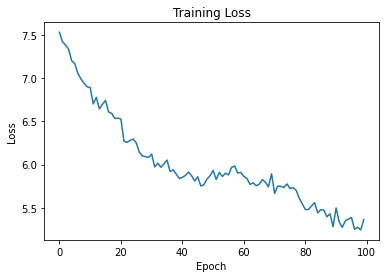

In [8]:
import matplotlib.pyplot as plt
plt.plot(df['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

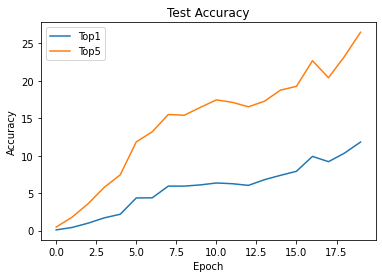

In [9]:
plt.plot(test_df['top1'])
plt.plot(test_df['top5'])
plt.legend(['Top1', 'Top5'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.show()
